<a href="https://colab.research.google.com/github/chilung/EmotionX2020/blob/master/pr_lab1_0686028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import logging

logging.basicConfig(level=logging.DEBUG, format='%(message)s')

logging.debug('Hello Debug')
logging.info('Hello Info')
logging.warning('Hello Warning')
logging.error('Hello Error')
logging.critical('Hello Critical')

Hello Debug
Hello Info
Hello Warning
Hello Error
Hello Critical
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [0]:
import re
import pandas as pd
from io import open
import glob
import os
import numpy as np
import math
from collections import OrderedDict
from collections import Counter
import torch
import torchvision
import heapq
import unicodedata
import string
import urllib.request as urllib

In [3]:
!ls
!rm auc*.*

sample_data
rm: cannot remove 'auc*.*': No such file or directory


#Title of Database: Arcene Dataset
https://archive.ics.uci.edu/ml/datasets/Arcene. 
The number of train dataset is 100 with 10000 features.
The number of valid dataset is also 100 with 10000 features.

In [0]:
def get_data_from_http(http_addr):
  http_data = urllib.urlopen(http_addr)

  data_collect = {}
  for i, data in enumerate(http_data):
    data_list = [d for d in data.decode("utf-8").split(' ')]
    data_collect[i] = [int(d) for d in data_list if d != '\n']
  
  return data_collect

In [5]:
# the source of train data, but got SSL certificate error
# train_data_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_train.data"
arcene_ttrain_data_http_addr = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/arcene/arcene_train.data"
# the source of valid data, but got SSL certificate error
# valid_data_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_valid.data"
arcene_tvalid_data_http_addr = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/arcene/arcene_valid.data"

arcene_train_dataset = get_data_from_http(arcene_ttrain_data_http_addr)
logging.info("number of train data set: {}".format(len(arcene_train_dataset)))
logging.info("number of train data feature: {}".format(len(arcene_train_dataset[0])))
logging.info("type of data: {}".format(type(arcene_train_dataset[0][0])))
logging.debug("the first train data (the first 100 items): {}".format(arcene_train_dataset[0][0:100]))

arcene_valid_dataset = get_data_from_http(arcene_tvalid_data_http_addr)
logging.info("number of valid data set: {}".format(len(arcene_valid_dataset)))
logging.info("number of valid data feature: {}".format(len(arcene_valid_dataset[0])))
logging.info("type of data: {}".format(type(arcene_valid_dataset[0][0])))
logging.debug("the first valid data (the first 100 items): {}".format(arcene_valid_dataset[0][0:100]))

number of train data set: 100
number of train data feature: 10000
type of data: <class 'int'>
the first train data (the first 100 items): [0, 71, 0, 95, 0, 538, 404, 20, 0, 0, 0, 0, 17, 0, 239, 0, 0, 0, 0, 0, 0, 0, 30, 0, 89, 262, 0, 147, 389, 0, 0, 103, 19, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 14, 3, 0, 0, 0, 0, 39, 0, 0, 46, 271, 0, 0, 2, 0, 0, 10, 0, 58, 91, 0, 0, 0, 131, 87, 454, 1, 40, 0, 44, 144, 0, 58, 0, 0, 0, 0, 0, 0, 65, 0, 0, 0, 479, 4, 0, 0, 352, 127, 53, 0, 0, 0, 0, 79, 4, 0]
number of valid data set: 100
number of valid data feature: 10000
type of data: <class 'int'>
the first valid data (the first 100 items): [0, 0, 156, 138, 2, 635, 444, 0, 1, 0, 0, 0, 8, 32, 420, 0, 0, 0, 0, 0, 33, 2, 0, 0, 254, 255, 0, 170, 546, 0, 111, 105, 1, 55, 0, 0, 65, 0, 3, 0, 67, 0, 0, 0, 223, 0, 0, 134, 0, 80, 0, 0, 44, 377, 0, 4, 0, 0, 0, 0, 0, 0, 221, 0, 41, 0, 0, 269, 484, 0, 106, 0, 0, 213, 208, 195, 0, 0, 0, 2, 0, 40, 0, 30, 0, 1, 536, 24, 0, 0, 476, 74, 48, 0, 0, 0, 0, 287, 0, 0]


In [0]:
def get_label_from_http(http_addr):
  http_label = urllib.urlopen(http_addr)

  label_collect = []
  for i, label in enumerate(http_label):
    label_collect = label_collect + [int(d) for d in label.decode("utf-8").split('\n') if d != '']
  
  return label_collect

In [7]:
# the source of train label, but got SSL certificate error
# train_label_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_train.labels"
arcene_train_label_http_addr = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/arcene/arcene_train.labels"
# the source of valid label, but got SSL certificate error
# valid_label_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/arcene_valid.labels"
arcene_valid_label_http_addr = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/arcene/arcene_valid.labels"

arcene_train_label = get_label_from_http(arcene_train_label_http_addr)
logging.info("number of train label: {}".format(len(arcene_train_label)))
logging.info("type of label: {}".format(type(arcene_train_label[0])))
logging.debug("the train label (the first 100 items): {}".format(arcene_train_label[0:100]))
pw0 = len([arcene_train_label[i] for i in arcene_train_label if i == 1]) / len(arcene_train_label)
logging.info(pw0)

arcene_valid_label = get_label_from_http(arcene_valid_label_http_addr)
logging.info("number of valid label: {}".format(len(arcene_valid_label)))
logging.info("type of label: {}".format(type(arcene_valid_label[0])))
logging.debug("the valid label (the first 100 items): {}".format(arcene_valid_label[0:100]))
pw1 = len([arcene_valid_label[i] for i in arcene_valid_label if i == -1]) / len(arcene_valid_label)
logging.info(pw1)


number of train label: 100
type of label: <class 'int'>
the train label (the first 100 items): [1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1]
0.44
number of valid label: 100
type of label: <class 'int'>
the valid label (the first 100 items): [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
0.56


In [0]:
arcene_class = [1, -1]

#Title of Database: Optical Recognition of Handwritten Digits
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [0]:
def get_data_label_from_http(http_addr):
  http_data = urllib.urlopen(http_addr)

  dataset = {}
  label = []
  for i, data in enumerate(http_data):
    #print(i, data)
    data_list = [int(d) for d in re.split(",|\n",data.decode("utf-8")) if d != '']
    dataset[i] = data_list[0:len(data_list)-1]
    label = label + [data_list[len(data_list)-1]]

  return dataset, label

In [10]:
optical_train_data_http_addr = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/optical/optdigits.tra"
optical_valid_data_http_addr = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/optical/optdigits.tes"

optical_train_dataset, optical_train_label = get_data_label_from_http(optical_train_data_http_addr)
logging.info("number of train data set: {}".format(len(optical_train_dataset)))
logging.info("number of train data feature: {}".format(len(optical_train_dataset[0])))
logging.info("type of data: {}".format(type(optical_train_dataset[0][0])))
logging.debug("the first train data (the first 100 items): {}".format(optical_train_dataset[0][0:100]))

logging.info("number of train label: {}".format(len(optical_train_label)))
logging.info("type of label: {}".format(type(optical_train_label[0])))
logging.debug("the train label (the first 100 items): {}".format(optical_train_label[0:100]))

optical_valid_dataset, optical_valid_label = get_data_label_from_http(optical_valid_data_http_addr)
logging.info("number of valid data set: {}".format(len(optical_valid_dataset)))
logging.info("number of valid data feature: {}".format(len(optical_valid_dataset[0])))
logging.info("type of data: {}".format(type(optical_valid_dataset[0][0])))
logging.debug("the first valid data (the first 100 items): {}".format(optical_valid_dataset[0][0:100]))

logging.info("number of valid label: {}".format(len(optical_valid_label)))
logging.info("type of label: {}".format(type(optical_valid_label[0])))
logging.debug("the valid label (the first 100 items): {}".format(optical_valid_label[0:100]))

number of train data set: 3823
number of train data feature: 64
type of data: <class 'int'>
the first train data (the first 100 items): [0, 1, 6, 15, 12, 1, 0, 0, 0, 7, 16, 6, 6, 10, 0, 0, 0, 8, 16, 2, 0, 11, 2, 0, 0, 5, 16, 3, 0, 5, 7, 0, 0, 7, 13, 3, 0, 8, 7, 0, 0, 4, 12, 0, 1, 13, 5, 0, 0, 0, 14, 9, 15, 9, 0, 0, 0, 0, 6, 14, 7, 1, 0, 0]
number of train label: 3823
type of label: <class 'int'>
the train label (the first 100 items): [0, 0, 7, 4, 6, 2, 5, 5, 0, 8, 7, 1, 9, 5, 3, 0, 4, 7, 8, 4, 7, 8, 5, 9, 1, 2, 0, 6, 1, 8, 7, 0, 7, 6, 9, 1, 9, 3, 9, 4, 9, 2, 1, 9, 9, 6, 4, 3, 2, 8, 2, 7, 1, 4, 6, 2, 0, 4, 6, 3, 7, 1, 0, 2, 2, 5, 2, 4, 8, 1, 7, 3, 0, 3, 3, 7, 7, 9, 1, 3, 3, 4, 3, 4, 2, 8, 8, 9, 8, 4, 7, 1, 6, 9, 4, 0, 1, 3, 6, 2]
number of valid data set: 1797
number of valid data feature: 64
type of data: <class 'int'>
the first valid data (the first 100 items): [0, 0, 5, 13, 9, 1, 0, 0, 0, 0, 13, 15, 10, 15, 5, 0, 0, 3, 15, 2, 0, 11, 8, 0, 0, 4, 12, 0, 0, 8, 8, 0, 0, 5, 8, 0, 0, 9, 8,

In [0]:
optical_class = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Glass Identification Dataset
http://archive.ics.uci.edu/ml/datasets/glass+identification

    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows (1)
          -- 17 vehicle windows (2)
       -- 76 non-float processed
          -- 76 building windows (3)
          -- 0 vehicle windows (4)
    -- 51 Non-window glass
       -- 13 containers (5)
       -- 9 tableware (6)
       -- 29 headlamps (7)

In [0]:
def get_idx_data_label_from_http(http_addr):
  http_data = urllib.urlopen(http_addr)

  idx = []
  dataset = {}
  label = []
  for i, data in enumerate(http_data):
    data_list = [d for d in re.split(",|\n",data.decode("utf-8")) if d != '']
    idx = idx + [data_list[0]]
    dataset[i] = [float(f) for f in data_list[1:len(data_list)-1]]
    label = label + [int(data_list[len(data_list)-1])]

  return dataset, label

In [13]:
glass_data_http_addr = "http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

glass_train_dataset, glass_train_label = get_idx_data_label_from_http(glass_data_http_addr)
logging.info("number of train data set: {}".format(len(glass_train_dataset)))
logging.info("number of train data feature: {}".format(len(glass_train_dataset[0])))
logging.info("type of data: {}".format(type(glass_train_dataset[0][0])))
logging.debug("the first train data (the first 100 items): {}".format(glass_train_dataset[0][0:100]))

logging.info("number of train label: {}".format(len(glass_train_label)))
logging.info("type of label: {}".format(type(glass_train_label[0])))
logging.debug("the train label (the first 100 items): {}".format(glass_train_label[0:100]))

number of train data set: 214
number of train data feature: 9
type of data: <class 'float'>
the first train data (the first 100 items): [1.52101, 13.64, 4.49, 1.1, 71.78, 0.06, 8.75, 0.0, 0.0]
number of train label: 214
type of label: <class 'int'>
the train label (the first 100 items): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [0]:
glass_class = [1, 2, 3, 4, 5, 6, 7]

In [0]:
# Preprocess the Label 1:
# 1, 2, 3, 4 -> 1; 5, 6, 7 -> 2

In [16]:
print(glass_train_label)
glass_train_label_1 = [1 if l in (1, 2, 3, 4) else 2 for l in glass_train_label]
print(glass_train_label_1)
glass_class_1 = [1, 2]

print(glass_train_label)
glass_train_label_2 = [1 if l in (1, 2) else 2 if l in (3, 4) else 3 for l in glass_train_label]
print(glass_train_label_2)
glass_class_2 = [1, 2, 3]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#Calculate probability of class p(w)

In [0]:
def cal_pw(label, class_set):
  pw = [label.count(class_index) / len(label) for class_index in class_set]
  pw = [g if g != 0 else 0.0001 for g in pw]
  return pw

#Calculate the Mean of a specified Feature in Specified Class
Function `mean_feature_class(data, label, f_index, class_set)`, the input paprmeters should be:
*   data: the whole dataset
*   label: the label of the data
*   f_index: feature index of the data, start from 0
*   class_set: 1 or -1 specified in the corresponding label

In [18]:
def mean_feature_class(data, label, f_index, class_set):
  #logging.debug([format(data[i][f_index]) for i in data])
  #logging.debug(label)
  #logging.debug([data[i][f_index] for i in data if label[i] == class_set])
  return np.mean([data[i][f_index] for i in range(len(data)) if label[i] == class_set])

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  logging.debug("mean of feature 0 in arcene class 1: {}".format(mean_feature_class(arcene_train_dataset, arcene_train_label, 0, arcene_class[0])))
  logging.debug("mean of feature 0 in arcene class -1: {}".format(mean_feature_class(arcene_train_dataset, arcene_train_label, 0, arcene_class[1])))

mean of feature 0 in arcene class 1: 35.90909090909091
mean of feature 0 in arcene class -1: 37.964285714285715


#Calculate the Variance of a specified Feature in Specified Class
Function `var_feature_class(data, label, f_index, class_set)`, the input paprmeters should be:
*   data: the whole dataset
*   label: the label of the data
*   f_index: feature index of the data, start from 0
*   class_set: 1 or -1 specified in the corresponding label

In [19]:
def var_feature_class(data, label, f_index, class_set):
  #logging.debug([format(data[i][f_index]) for i in data])
  #logging.debug(label)
  #logging.debug([data[i][f_index] for i in data if label[i] == class_set])
  return np.var([data[i][f_index] for i in range(len(data)) if label[i] == class_set])

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  logging.debug("var of feature 0 in class 1: {}".format(var_feature_class(arcene_train_dataset, arcene_train_label, 5, arcene_class[0])))
  logging.debug("var of feature 0 in class -1: {}".format(var_feature_class(arcene_train_dataset, arcene_train_label, 5, arcene_class[1])))

var of feature 0 in class 1: 11238.542871900827
var of feature 0 in class -1: 11901.860969387755


#Features Selection According to H0 Test
```
g = ((xbar-ybar) - (ux-uy)) / sqrt(xvar/Nx + xvar/Ny)
where
g is the H0 test variable
xbar is the sample mean of specified feature in class 1
ybar is the sample mean of specified feature in class -1
ux is the real mean of specified feature in class 1
uy is the real mean of specified feature in class -1
xvar is the variance of specified feature in class 1
yvar is the variance of specified feature in class -1
Nx is the number of data of specified feature in class 1
Ny is the number of data of specified feature in class -1
```
We will have a hypothesis that ux = uy by setting ux-uy = 0 and to see if we can reject the H0 hypothesis in order to select the specified feature. In `reject_h0_hypothesis(data, label, f_index = 0, conf_level = 0.8)`, data is the dataset, label is the label corrseponding to the dataset data, f_index is the feature index, and conf_level is the confidence level as list in acceptance_interval collection.



In [0]:
acceptance_interval = {0.8: 1.282, 0.85: 1.440, 0.9: 1.645, 0.95: 1.967, 0.98: 2.326, 0.99: 2.576, 0.998: 3.090, 0.999: 3.291}

def reject_h0_hypothesis(data, label, class_set, f_index = 0, conf_level = 0.8):

  xbar = mean_feature_class(data, label, f_index, class_set[0])
  ybar = mean_feature_class(data, label, f_index, class_set[1])
  xvar = var_feature_class(data, label, f_index, class_set[0])
  yvar = var_feature_class(data, label, f_index, class_set[1])
  Nx = len([label[i] for i in range(len(label)) if label[i] == class_set[0]])
  Ny = len([label[i] for i in range(len(label)) if label[i] == class_set[1]])

  if xvar == 0 or yvar == 0:
    # logging.info("feature {}: xvar: {}, yvar: {}".format(f_index, xvar, yvar))
    return False

  g = (xbar-ybar) / math.sqrt((xvar/Nx) + (yvar/Ny))
  return (abs(g) > acceptance_interval[conf_level])

In [29]:
def h0_hypothesis_feature_selection_collection(data, label, class_set, file_path):
  if os.path.isfile(file_path):
    logging.info("import h0_feature_selection_collection from file {}".format(file_path))
    df = pd.read_csv(file_path)
    h0_feature_selection_collection = {}
    for c_level in acceptance_interval:
      feature_selection = [item for index, item in enumerate(df[str(c_level)])]
      h0_feature_selection_collection[c_level] = feature_selection
      logging.info("confidence level {}, No. of feaature: {}, feature  (the first 100 items): {}".format(c_level, len([1 for i in feature_selection if i == True]), feature_selection[0:100]))
  else:
    logging.info("{} not found. Process the H0 hypothesis on features selection.".format(file_path))
    h0_feature_selection_collection = {}
    for c_level in acceptance_interval:
      feature_selection = [reject_h0_hypothesis(data, label, class_set, i, c_level) for i in range(len(data[0]))]
      h0_feature_selection_collection[c_level] = feature_selection
      logging.info("confidence level {}, No. of feaature: {}, feature set (the first 100 items): {}".format(c_level, len([1 for i in feature_selection if i == True]), feature_selection[0:100]))

    logging.info("export h0_feature_selection_collection to file {}".format(file_path))
    h0_hypothesis_feature_selection_file = file_path
    h0_df = pd.DataFrame({key:pd.Series(value) for key, value in h0_feature_selection_collection.items()})
    h0_df.to_csv(h0_hypothesis_feature_selection_file)

  return h0_feature_selection_collection

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  arcene_h0_feature_selection_collection = h0_hypothesis_feature_selection_collection(arcene_train_dataset, arcene_train_label, arcene_class, 'drive/My Drive/Colab Notebooks/arcene_h0_hypothesis.cvs')
  for c_level in arcene_h0_feature_selection_collection:
    feature_selection = arcene_h0_feature_selection_collection[c_level]
    logging.info("confidence level {}, No. of feaature: {}, feature set (the first 100 items): {}".format(c_level, len([1 for i in feature_selection if i == True]), feature_selection[0:100]))


drive/My Drive/Colab Notebooks/arcene_h0_hypothesis.cvs not found. Process the H0 hypothesis on features selection.
confidence level 0.8, No. of feaature: 4582, feature set (the first 100 items): [False, False, False, False, True, False, True, False, True, True, True, True, False, False, True, True, True, False, True, False, True, True, False, True, True, False, False, False, False, True, True, False, False, True, True, True, False, True, False, False, False, False, True, False, True, False, True, True, True, False, True, False, False, True, False, False, True, False, False, False, True, False, True, False, False, True, True, True, True, False, False, True, False, False, False, False, False, True, True, False, True, False, False, False, False, True, True, False, True, True, True, True, False, True, False, False, True, False, False, False]
confidence level 0.85, No. of feaature: 4145, feature set (the first 100 items): [False, False, False, False, True, False, True, False, True, True, T

#Features Selection According to ROCs and their corresponding AUC
We set the threshold from 0 to 999. By classifying the data to class w1 (-1) if the data is less than the threshold and to class w0 (1) if the data is larger than the threshold. We have `alpha`, the number of data classfied to w0 but w1 in real and `One_Beta` (1-Beta), the number of data classified to w0 and w0 in real.

In [0]:
auc_area = [0.15, 0.17, 0.19, 0.20, 0.23]

def auc_feature_selection(data, label, class_set, f_index, area_criteron, data_range = 1000, ping_step = 20):
  num_w0 = len([label[i] for i in range(len(label)) if label[i] == class_set[0]])
  num_w1 = len([label[i] for i in range(len(label)) if label[i] == class_set[1]])

  alpha = []
  One_Beta = []

  ping_range = range(0, data_range, ping_step)
 
  for j in ping_range:
    class_w0 = [i for i in data if data[i][f_index] >= j] # classified to w0 (= 1)
    class_w1 = [i for i in data if data[i][f_index] < j] # classified to w1 (= -1)
    
    # logging.debug("class w0: {}".format(class_w0))
    # logging.debug("class w1: {}".format(class_w1))
    
    One_Beta = One_Beta + [len([i for i in class_w0 if label[i] == class_set[0]]) / num_w0] # 1 - Beta
    alpha = alpha + [len([i for i in class_w0 if label[i] == class_set[1]]) / num_w1] # alpha

  # logging.debug(alpha)
  # logging.debug(One_Beta)

  auc = 0
  for i in range(len(ping_range)-1):
    auc = auc + (((alpha[i]+alpha[i+1])-(One_Beta[i]+One_Beta[i+1])) * (alpha[i]-alpha[i+1]) / 2)
  
  if auc > 0:
    One_Beta, alpha = alpha, One_Beta
  
  auc = abs(auc)
  return (auc >= area_criteron), alpha, One_Beta

In [31]:
def auc_feature_selection_collection(data, label, class_set, file_path):
  if os.path.isfile(file_path):
    logging.info("import auc_feature_selection_collection from file {}".format(file_path))
    df = pd.read_csv(file_path)
    auc_feature_selection_collection = {}
    for a_level in auc_area:
      feature_selection = [item for index, item in enumerate(df[str(a_level)])]
      auc_feature_selection_collection[a_level] = feature_selection
      logging.info("AUC area {}, No. of feature: {}, feature set (the first 100 items): {}".format(a_level, len([1 for i in feature_selection if i == True]), feature_selection[0:100]))
  else:
    logging.info("{} not found. Process the AUC area on features selection.".format(file_path))
    auc_feature_selection_collection = {}
    for a_level in auc_area:
      feature_selection = [auc_feature_selection(data, label, class_set, i, a_level)[0] for i in range(len(data[0]))]
      auc_feature_selection_collection[a_level] = feature_selection
      logging.info("AUC area {}, No. of feature: {}, feature set (the first 100 items): {}".format(a_level, len([1 for i in feature_selection if i == True]), feature_selection[0:100]))
  
    logging.info("export auc_feature_selection_collection to file {}".format(file_path))
    auc_area_feature_selection_file = file_path
    auc_df = pd.DataFrame({key:pd.Series(value) for key, value in auc_feature_selection_collection.items()})
    auc_df.to_csv(auc_area_feature_selection_file)
  
  return auc_feature_selection_collection

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  arcene_auc_selection_collection = auc_feature_selection_collection(arcene_train_dataset, arcene_train_label, arcene_class, 'drive/My Drive/Colab Notebooks/arcene_auc_area.cvs')
  for a_level in arcene_auc_selection_collection:
    feature_selection = arcene_auc_selection_collection[a_level]
    logging.info("confidence level {}, No. of feaature: {}, feature set (the first 100 items): {}".format(a_level, len([1 for i in feature_selection if i == True]), feature_selection[0:100]))

drive/My Drive/Colab Notebooks/arcene_auc_area.cvs not found. Process the AUC area on features selection.
AUC area 0.15, No. of feature: 892, feature set (the first 100 items): [False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False]
AUC area 0.17, No. of feature: 452, feature set (the first 100 items): [False, False, False, False, True, False, True, False, False, T

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 70

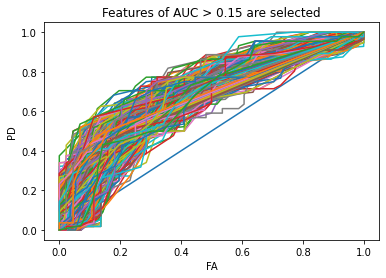

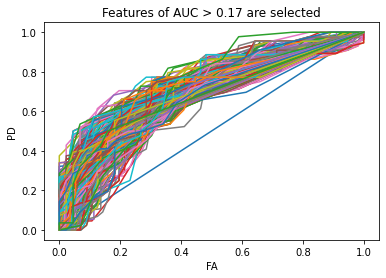

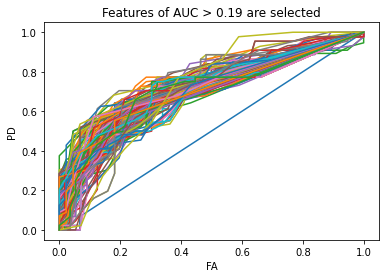

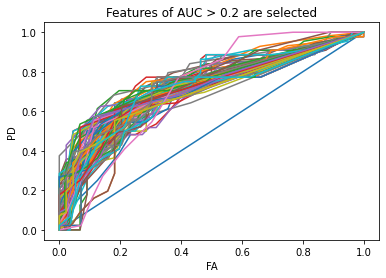

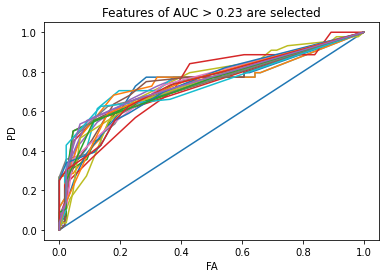

None


In [32]:
import matplotlib.pyplot as plt
def plot_auc(data, label, calss_set):
  t = np.arange(0, 1, 0.001)

  for a_level in auc_area:
    plt.plot(t, t)
    plt.ylabel('PD')
    plt.xlabel('FA')
    plt.title('Features of AUC > {} are selected'.format(a_level))

    for i in range(len(data[0])):
      auc_result, alpha, One_Beta = auc_feature_selection(data, label, calss_set, i, a_level)
      if auc_result:
        plt.plot(alpha, One_Beta)
    plt.show()

  plt.show()

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  print(plot_auc(arcene_train_dataset, arcene_train_label, arcene_class))

#Features Selection According to Features' Similarity
We compare the feature vectors and exclude the features similar much to previos shown features. We use cosine function to compare the similarity and set the consine value as exclusion boundary.

In [0]:
def cosine_similarity(vec_a, vec_b):
  assert len(vec_a) == len(vec_b)
  if sum(vec_a) == 0 or sum(vec_b) == 0:
    return 0 # hack
  a_b = sum(i[0] * i[1] for i in zip(vec_a, vec_b))
  a_2 = sum([i*i for i in vec_a])
  b_2 = sum([i*i for i in vec_b])
  return a_b/(math.sqrt(a_2) * math.sqrt(b_2))

def get_vec(matrix_x, col_index):
  return([matrix_x[row_index][col_index] for row_index in range(len(matrix_x))])

In [0]:
similarity_criteria = [0.2, 0.4, 0.6, 0.8]
similarity_file_path = 'similarity.cvs'

def similarity_feature_selction(data, sim_criteron):
  feat_len = len(data[0])
  # feat_len = 10

  selected_feature = [True for i in range(feat_len)]
  
  for first_vec_index in range(feat_len-1):
    if selected_feature[first_vec_index] == True:
      vec_a = get_vec(data, first_vec_index)

      for second_vec_index in range(first_vec_index+1, feat_len):
        vec_b = get_vec(data, second_vec_index)
        if cosine_similarity(vec_a, vec_b) > sim_criteron:
          selected_feature[second_vec_index] = False

  return selected_feature

if logging.getLogger().getEffectiveLevel() == logging.WARNING:

  sim_feature_selection_collection = {}
  for sim_criteron in similarity_criteria:
    feature_selection = similarity_feature_selction(train_dataset, sim_criteron)
    sim_feature_selection_collection[sim_criteron] = feature_selection
    logging.info("Similarity {}, No. of feaature: {}, feature set (the first 100 items): {}".format(sim_criteron, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
  
  similarity_feature_selection_file = similarity_file_path
  sim_df = pd.DataFrame({key:pd.Series(value) for key, value in sim_feature_selection_collection.items()})
  sim_df.to_csv(similarity_feature_selection_file)

In [0]:
similarity_file_path = 'similarity.cvs'

if os.path.isfile(similarity_file_path):
  logging.info("import sim_feature_selection_collection from file {}".format(similarity_file_path))
  df = pd.read_csv(similarity_file_path)
  sim_feature_selection_collection = {}
  for sim_criteron in similarity_criteria:
    feature_selection = [item for index, item in enumerate(df[str(sim_criteron)]) if item != "NaN"]
    sim_feature_selection_collection[sim_criteron] = feature_selection
    logging.info("Similarity {}, No. of feaature: {}, feature set (the first 100 items): {}".format(sim_criteron, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
#else:
  #logging.info("{} not found. Process the Similarity features selection.".format(similarity_file_path))
  #sim_feature_selection_collection = {}
  #for sim_criteron in similarity_criteria:
  #  feature_selection = similarity_feature_selction(train_dataset, sim_criteron)
  #  sim_feature_selection_collection[sim_criteron] = feature_selection
  #  logging.info("Similarity {}, No. of feaature: {}, feature set (the first 100 items): {}".format(sim_criteron, len(feature_selection), feature_selection[0:100]))
  #  logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
  
  #logging.info("export sim_feature_selection_collection to file {}".format(similarity_file_path))
  #similarity_feature_selection_file = similarity_file_path
  #sim_df = pd.DataFrame({key:pd.Series(value) for key, value in sim_feature_selection_collection.items()})
  #sim_df.to_csv(similarity_feature_selection_file)

#Get Selected Features according to Feature Selection Result of Different Methods

In [0]:
def get_selected_feature_in_class(data, label, feature_sel, class_item):
  if class_item == 'ALL':
    return [[data[row_index][col_index] \
    for col_index in range(len(data[0])) if feature_sel[col_index] == True] \
    for row_index in range(len(data))]
  else:
    return [[data[row_index][col_index] \
    for col_index in range(len(data[0])) if feature_sel[col_index] == True] \
    for row_index in range(len(data)) if label[row_index] == class_item]

def compute_mean(data):
  return np.mean(data, axis = 0)

def compute_variance(data):
  return np.var(data, axis = 0)

def compute_cov_matrix(data):
  alpha = 0.01
  cov_matrix = np.cov(data, rowvar = False, bias = True)
  return cov_matrix + alpha * np.identity(cov_matrix.shape[0])


if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  class_w0 = get_selected_feature_in_class(arcene_train_dataset, arcene_train_label, arcene_h0_feature_selection_collection[0.95], arcene_class[0])
  class_w1 = get_selected_feature_in_class(arcene_train_dataset, arcene_train_label, arcene_h0_feature_selection_collection[0.95], arcene_class[1])
  
  class_w0_mean = compute_mean(class_w0)
  class_w0_var = compute_variance(class_w0)
  class_w0_cov_matrix = compute_cov_matrix(class_w0)
  class_w0_inv_cov_matrix = np.linalg.inv(class_w0_cov_matrix)
  class_w0_cov_matrix_det = np.linalg.det(class_w0_cov_matrix)

  #logging.info("Class W0:\nRow: {}, Col: {}\nData: {}".format(len(class_w0), len(class_w0[0]), class_w0))
  #logging.info("Class W0 mean:\n{}".format(class_w0_mean))
  #logging.info("Class W0 Covariance Matrix:\n{}".format(class_w0_cov_matrix))
  #logging.info("Class W0 Inverse Covariance Matrix:\n{}".format(class_w0_inv_cov_matrix))
  #logging.info("Class W0 Covariance Matrix Determinant:\n{}".format(class_w0_cov_matrix_det))

  class_w1_mean = compute_mean(class_w1)
  class_w1_var = compute_variance(class_w1)
  class_w1_cov_matrix = compute_cov_matrix(class_w1)
  class_w1_inv_cov_matrix = np.linalg.inv(class_w1_cov_matrix)
  class_w1_cov_matrix_det = np.linalg.det(class_w1_cov_matrix)

  #logging.info("Class W1:\nRow: {}, Col: {}\nData: {}".format(len(class_w1), len(class_w1[0]), class_w1))
  #logging.info("Class W1 mean:\n{}".format(class_w1_mean))
  #logging.info("Class W1 Covariance Matrix:\n{}".format(class_w1_cov_matrix))
  #logging.info("Class W1 Inverse Covariance Matrix:\n{}".format(class_w1_inv_cov_matrix))
  #logging.info("Class W1 Covariance Matrix Determinant:\n{}".format(class_w1_cov_matrix_det))

#Online Perceptron Algorithm
```
w(t+1) = w(t) + lr * delta(x) * x
delta(x) = 1, if x is belongs to w0
delta(x) = -1, if x is belongs to w1
x if the misclassified by w(t)
```



In [42]:
from random import sample
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(a)

print(sample(a, 10))
for i in range(10):
  print(i)
for i in sample(range(10),10):
  print(i)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[9, 4, 7, 2, 5, 3, 1, 8, 10, 6]
0
1
2
3
4
5
6
7
8
9
1
8
9
4
6
2
0
5
3
7


In [0]:
def perform_Perceptron_online_training(data, label, feature_selection, mode='sequential'):
  if mode != ['sequential', 'random']:
    mode = 'sequential'

  logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
  dataset_selected_feature = np.array(get_selected_feature_in_class(data, label, feature_selection, 'ALL'))

  delta = np.array([label[i] for i in range(len(label))])
  weight = np.random.rand(len(dataset_selected_feature[0]))

  iter = 0
  lr = 0.1
  misclassified = 1

  iter_record = {}
  while iter < 300 and misclassified != 0:
    misclassified = 0
    num_data = len(dataset_selected_feature)
    for i in range(num_data) if mode == 'sequential' else sample(range(num_data), num_data):
      if np.dot(weight, dataset_selected_feature[i]) * delta[i] < 0:
        misclassified = misclassified + 1
        weight = weight + lr * dataset_selected_feature[i] * delta[i]
    iter_record[iter] = misclassified
    iter = iter + 1
    
    #if iter == 50 or iter == 100 or iter == 150 or iter == 200:
    #  lr = lr / 2
      
    #print("iter = {}, misclassified = {}", iter, misclassified)

  result_array = []
  correct = 0
  for i in range(len(label)):
    result = 1 if np.dot(weight, dataset_selected_feature[i]) > 0 else -1
    if result == label[i]:
      correct = correct + 1
    result_array = result_array + [result]
  logging.info("iter: {}, accuracy: {}".format(iter, correct / len(label)))
  #logging.info(label)
  #logging.info(result_array)

  return weight, iter_record

In [0]:
def perform_Perceptron_evaluation(data, label, feature_selection, weight):
  logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
  dataset_selected_feature = np.array(get_selected_feature_in_class(data, label, feature_selection, 'ALL'))

  result_array = []
  correct = 0
  for i in range(len(label)):
    result = 1 if np.dot(weight, dataset_selected_feature[i]) > 0 else -1
    if result == label[i]:
      correct = correct + 1
    result_array = result_array + [result]
  logging.info("Accuracy: {}".format(correct / len(label)))
  #logging.info(label)
  #logging.info(result_array)

  return correct / len(label)

#Confusion Matrix

In [0]:
def confusion_matrix(result, label, class_set):
  print("          Prediction Result")
  print("{:5}".format('Label'),end='')
  
  for class_item in class_set:
    print("{:5}".format(class_item), end='')
  print()
  
  for real_class_index in class_set:
    print("{:5}".format(real_class_index), end='')
    for pred_class_index in class_set:
      c = sum([1 if label[i]==real_class_index and result[i]==pred_class_index else 0 for i in range(len(result))])
      print("{:5}".format(c), end='')
    print('')

#Naive Bayesian Classifier
```
P(w|X)
= P(w|X) = p(w, X) / p(X) = p(w, X) / p(X) * p(w) / p(w)
= p(X|w) * p(w) / p(X)
= p(x1, x2, ..., xD|w) * p(w) / p(X)
= p(x1|w)p(x2|w)...p(xD|w)p(w)/p(X) ... (1)
We assign X to w0 if log(p(w0|X)) > log(p(w1|X)).
We will not compute p(X) in denominator in equ (1).
log(p(x1|w)p(x2|w)...p(xD|w)p(w))
= log(p(x1|w)) + log(p(x2|w)) + ... + log(p(xD|w) + log(p(w))
=-1/2(log(var(x1))+...+log(var(xD)))-1/2((x1-u1)^2+...+((xD-uD))+log(p(w))
```



In [0]:
def naive_bayesian_classifier(vdata, vlabel, class_set, feature_sel, class_list):
  correct = 0
  result_array = []

  pw = cal_pw(vlabel, class_set)

  for row_index in vdata:
    x_1D = np.array([vdata[row_index][col_index] for col_index in range(len(vdata[row_index])) if feature_sel[col_index] == True])

    pw_x = []
    for index, class_item in enumerate(class_set):
      prob = -sum((x_1D-class_list[class_item]["mean"])*(x_1D-class_list[class_item]["mean"])/class_list[class_item]["var"])/2 + np.log(pw[index])
      pw_x = pw_x + [prob]
    
    result = class_set[np.argmax(pw_x)]
    result_array = result_array + [result]

    if result == vlabel[row_index]:
      correct = correct + 1

  # confusion_matrix(result_array, vlabel, class_set)

  return correct / len(vlabel), result_array

In [0]:
def perform_validation_on_naive(vdata, vlabel, tdata, tlabel, class_set, feature_selection):
  print("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))

  class_list = {}
  for class_item in class_set:
    class_object = {}
    class_selected_feature = get_selected_feature_in_class(tdata, tlabel, feature_selection, class_item)

    if len(class_selected_feature) == 0:
      class_object["mean"] = np.zeros(len([1 for i in feature_selection if i == True]))
      class_object["var"] = np.array([0.1 for i in feature_selection if i == True])
    else:
      class_object["mean"] = compute_mean(class_selected_feature)
      class_object["var"] = compute_variance(class_selected_feature) + 0.1
    class_list[class_item] = class_object

  acc, result_array = naive_bayesian_classifier(vdata, vlabel, class_set, feature_selection, class_list)
  print("accuracy: {}".format(acc))
  
  return acc, result_array

#if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  #acc, result_array = perform_validation_on_naive(glass_train_dataset, glass_train_label, glass_train_dataset, glass_train_label, glass_class, glass_all_feature_selected[1])

#Bayesian Classifier
Classify x random variables with K features into M classes.  We will compute p(w1|x), p(w2|x), ... p(wM|x) and assign x to wi if p(wi|x) > p(wj|x) for i<>j.
According to Baysian Classification, p(wi|x) = p(x|wi)\*p(wi)/p(x) = p(x|wi)\*p(wi)/summation of (p(x|wj)\*p(wj) for j=1..M).
Since summation of (p(x|wj)\*p(wj) for j=1..M are all equal for any class i, we will only compute p(x|wi)\*p(wi).
Assume x is a multivariance normal distribution with K dimensions, the likelihood function is 1/((2pi^(K/2))(determinant of covariance matrix)) \* exp (-1/2 (x-u)T(inverse of covariance matrix)(x-u)). Insteade of computing p(x|wi)\*p(wi), we prefer to compute log of (p(x|wi)\*p(wi)).
```
Log(p(x|wi)\*p(wi))
= log(p(x|wi) + log(p(wi))
= - (K/2)log(2pi) - 1/2*log(|E|) - 1/2 (x-u)T(A)(x-u) + log(p(wi))
= - (K/2)log(2pi) - 1/2*log(|E|) - 1/2 (xTAx - uTAx - xTAu + uTAu) + log(p(wi))
```

In [0]:
def show_matrix_row_col(matrix_x):
  print(matrix_x.shape[0], matrix_x.shape[1])

def bayesian_classifier(vdata, vlabel, class_set, feature_sel, class_list):
  correct = 0
  result_array = []
  pw = cal_pw(vlabel, class_set)

  for row_index in vdata:
    x = np.array([vdata[row_index][col_index] for col_index in range(len(vdata[row_index])) if feature_sel[col_index] == True])

    pw_x = []
    for index, class_item in enumerate(class_set):
      x_1D = x - class_list[class_item]["mean"]
      x_2D = x_1D.reshape(x_1D.shape[0], 1)
      x_2DT = x_1D.reshape(1, x_1D.shape[0]) 
      prob = -np.dot(np.dot(x_2DT, class_list[class_item]["inv_cov_matrix"]), x_2D)[0][0] / 2 + np.log(pw[0])

      pw_x = pw_x + [prob]
    
    result = class_set[np.argmax(pw_x)]
    result_array = result_array + [result]

    if result == vlabel[row_index]:
      correct = correct + 1
    
  #logging.debug("result: {}".format(result_array))
  #logging.debug("label : {}".format(vlabel))

  return correct / len(vlabel), result_array

In [0]:
def perform_validation_on_bayesian(vdata, vlabel, tdata, tlabel, class_set, feature_selection):
  print("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))

  class_list = {}
    
  for class_item in class_set:
    class_object = {}
    class_object["data"] = get_selected_feature_in_class(tdata, tlabel, feature_selection, class_item)
  
    if len(class_object["data"]) == 0:
      class_object["mean"] = np.zeros(len([1 for i in feature_selection if i == True]))
      class_object["cov_matrix"] = np.identity(len([1 for i in feature_selection if i == True])) * 0.0001
    else:
      class_object["mean"] = compute_mean(class_object["data"])
      class_object["cov_matrix"] = compute_cov_matrix(class_object["data"])
    class_object["inv_cov_matrix"] = np.linalg.inv(class_object["cov_matrix"])
    class_object["cov_matrix_det"] = np.linalg.det(class_object["cov_matrix"])
    class_list[class_item] = class_object

  acc, result_array = bayesian_classifier(vdata, vlabel, class_set, feature_selection, class_list)

  print("accuracy: {}".format(acc))
  return acc, result_array

#acc, result_array = perform_validation_on_bayesian(glass_train_dataset, glass_train_label, glass_train_dataset, glass_train_label, glass_class,
#                                                   glass_all_feature_selected[1])
#confusion_matrix(result_array, glass_train_label, glass_class)

#Cross Validation

In [50]:
def cross_validation(data, label, class_set, feature_selection, classifier):
  scores = []
  scores_record = {}
  
  partition = 5
  blob = int(len(data) / partition)

  pick_no_per_run = [int(label.count(i)/len(label)*blob) for i in class_set]

  for run_idx in range(partition):
    t_set = [1 for s in range(len(data))]
    v_set = [0 for s in range(len(data))]

    print("Validation Run {}, validation set {}~{}".format(run_idx, run_idx*blob, (run_idx+1)*blob-1))
    
    begin_point = run_idx * blob
    for c, _ in enumerate(arcene_class):
      get_no = 0
      scan_idx = begin_point
      while get_no < pick_no_per_run[c]:
        if arcene_train_label[scan_idx] == arcene_class[c]:
          t_set[scan_idx], v_set[scan_idx] = 0, 1
          get_no = get_no + 1
        scan_idx = (scan_idx + 1) % len(data)

    t_data, v_data = {}, {}
    t_label, v_label = [], []
    t_index, v_index = 0, 0

    for idx, d in enumerate(arcene_train_dataset):
      if t_set[idx] == 1:
        t_data[t_index] = data[idx]
        t_label = t_label + [label[idx]]
        t_index = t_index + 1
      if v_set[idx] == 1:
        v_data[v_index] = data[idx]
        v_label = v_label + [label[idx]]
        v_index = v_index + 1

    score, result_array = classifier(v_data, v_label, t_data, t_label, arcene_class, feature_selection)

    scores = scores + [score]
    scores_record["Run{}".format(run_idx)] = score

  ave_score = np.average(scores)
  return ave_score, scores_record

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  ave_score, scores_record = cross_validation(arcene_train_dataset, arcene_train_label, arcene_class,
                                             arcene_h0_feature_selection_collection[0.999], perform_validation_on_naive)
  print("Cross Validation Average Score: {}".format(ave_score))
  print(scores_record)

Validation Run 0, validation set 0~19
No. of selected feaature: 592
accuracy: 0.6842105263157895
Validation Run 1, validation set 20~39
No. of selected feaature: 592
accuracy: 0.7368421052631579
Validation Run 2, validation set 40~59
No. of selected feaature: 592
accuracy: 0.6842105263157895
Validation Run 3, validation set 60~79
No. of selected feaature: 592
accuracy: 0.631578947368421
Validation Run 4, validation set 80~99
No. of selected feaature: 592
accuracy: 0.8421052631578947
Cross Validation Average Score: 0.7157894736842104
{'Run0': 0.6842105263157895, 'Run1': 0.7368421052631579, 'Run2': 0.6842105263157895, 'Run3': 0.631578947368421, 'Run4': 0.8421052631578947}


In [0]:
def cross_validation_classifer(data, label, class_set, classifier):
  ave_scores = {}
  all_scores = {}

  #for all_level in arcene_all_feature_selected:
  #  ave_score, scores_record = cross_validation(data, label, class_set,
  #                                           arcene_all_feature_selected[all_level], classifier)
  #  method_score = {}
  #  method_score["score"], method_score["collection"], method_score["index"] = ave_score, arcene_all_feature_selected, all_level
  #  ave_scores["ALL"+str(all_level)] = method_score
  #  all_scores["ALL"+str(all_level)] = scores_record

  for c_level in arcene_h0_feature_selection_collection:
    ave_score, scores_record = cross_validation(data, label, class_set,
                                               arcene_h0_feature_selection_collection[c_level], classifier)
    method_score = {}
    method_score["score"], method_score["collection"], method_score["index"] = ave_score, arcene_h0_feature_selection_collection, c_level
    ave_scores["H0_"+str(c_level)] = method_score
    all_scores["H0_"+str(c_level)] = scores_record

  for a_level in arcene_auc_feature_selection_collection:
    ave_score, scores_record = cross_validation(data, label, class_set,
                                               arcene_auc_feature_selection_collection[a_level], classifier)
    method_score = {}
    method_score["score"], method_score["collection"], method_score["index"] = ave_score, arcene_auc_feature_selection_collection, a_level
    ave_scores["AUC_"+str(a_level)] = method_score
    all_scores["AUC_"+str(a_level)] = scores_record

  return ave_scores, all_scores

#Validate the Datasdet of Arcene Dataset

In [52]:
arcene_pw = cal_pw(arcene_train_label, arcene_class)
logging.info(arcene_pw)

[0.44, 0.56]


In [53]:
#
# Valid the Data using Perceptron Classifier
#

iter_records = {}
perceptron_weight_collect = {}

for c_level in arcene_h0_feature_selection_collection:
  perceptron_weight, iter_record = perform_Perceptron_online_training(arcene_train_dataset, arcene_train_label, arcene_h0_feature_selection_collection[c_level])
  perceptron_weight_collect[c_level] = perceptron_weight
  iter_records[c_level] = iter_record

rnd_iter_records = {}
rnd_perceptron_weight_collect = {}

for c_level in arcene_h0_feature_selection_collection:
  perceptron_weight, iter_record = perform_Perceptron_online_training(arcene_train_dataset, arcene_train_label, arcene_h0_feature_selection_collection[c_level], mode='random')
  rnd_perceptron_weight_collect[c_level] = perceptron_weight
  rnd_iter_records[c_level] = iter_record

No. of selected feaature: 4582
iter: 28, accuracy: 1.0
No. of selected feaature: 4145
iter: 24, accuracy: 1.0
No. of selected feaature: 3604
iter: 23, accuracy: 1.0
No. of selected feaature: 2852
iter: 32, accuracy: 1.0
No. of selected feaature: 2094
iter: 30, accuracy: 1.0
No. of selected feaature: 1619
iter: 78, accuracy: 1.0
No. of selected feaature: 801
iter: 105, accuracy: 1.0
No. of selected feaature: 592
iter: 239, accuracy: 1.0
No. of selected feaature: 4582
iter: 28, accuracy: 1.0
No. of selected feaature: 4145
iter: 18, accuracy: 1.0
No. of selected feaature: 3604
iter: 23, accuracy: 1.0
No. of selected feaature: 2852
iter: 32, accuracy: 1.0
No. of selected feaature: 2094
iter: 62, accuracy: 1.0
No. of selected feaature: 1619
iter: 78, accuracy: 1.0
No. of selected feaature: 801
iter: 81, accuracy: 1.0
No. of selected feaature: 592
iter: 297, accuracy: 1.0


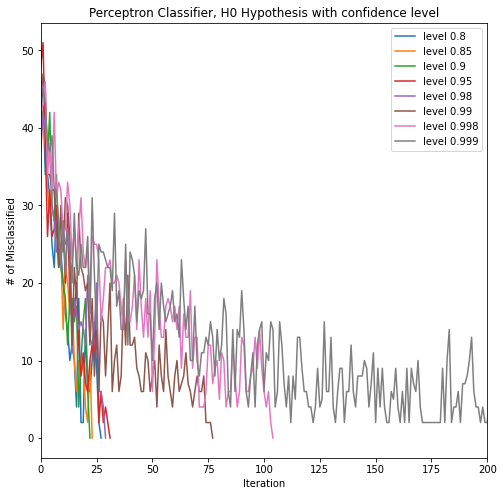

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.ylabel('# of Misclassified')
plt.xlabel('Iteration')
plt.title("Perceptron Classifier, H0 Hypothesis with confidence level")
  
plot_x, plot_y, legend = [], [], []
for record in iter_records:
  plot_x, plot_y = [iter for iter in iter_records[record]], [iter_records[record][iter] for iter in iter_records[record]]
  plt.xlim(0, 200)
  plt.plot(plot_x, plot_y)
  legend = legend + ["level {}".format(record)]
plt.legend(legend)
plt.show()

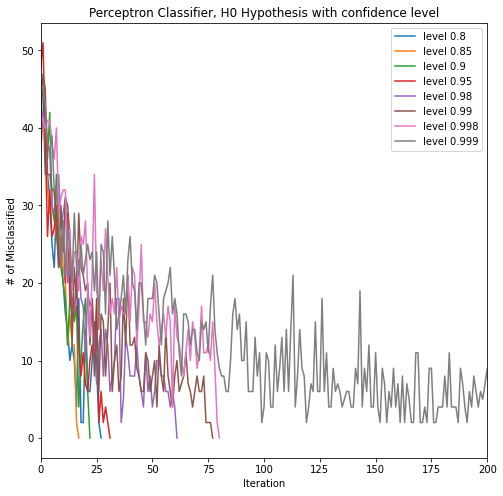

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.ylabel('# of Misclassified')
plt.xlabel('Iteration')
plt.title("Perceptron Classifier, H0 Hypothesis with confidence level")
  
plot_x, plot_y, legend = [], [], []
for record in iter_records:
  plot_x, plot_y = [iter for iter in rnd_iter_records[record]], [rnd_iter_records[record][iter] for iter in rnd_iter_records[record]]
  plt.xlim(0, 200)
  plt.plot(plot_x, plot_y)
  legend = legend + ["level {}".format(record)]
plt.legend(legend)
plt.show()

In [56]:
for c_level in arcene_h0_feature_selection_collection:
  logging.info("Evaluation on H0 Feature Selection {} with Accuracy: {}".format( 
        c_level, perform_Perceptron_evaluation(arcene_valid_dataset, arcene_valid_label, arcene_h0_feature_selection_collection[c_level], perceptron_weight_collect[c_level])))

No. of selected feaature: 4582
Accuracy: 0.78
Evaluation on H0 Feature Selection 0.8 with Accuracy: 0.78
No. of selected feaature: 4145
Accuracy: 0.8
Evaluation on H0 Feature Selection 0.85 with Accuracy: 0.8
No. of selected feaature: 3604
Accuracy: 0.8
Evaluation on H0 Feature Selection 0.9 with Accuracy: 0.8
No. of selected feaature: 2852
Accuracy: 0.81
Evaluation on H0 Feature Selection 0.95 with Accuracy: 0.81
No. of selected feaature: 2094
Accuracy: 0.8
Evaluation on H0 Feature Selection 0.98 with Accuracy: 0.8
No. of selected feaature: 1619
Accuracy: 0.79
Evaluation on H0 Feature Selection 0.99 with Accuracy: 0.79
No. of selected feaature: 801
Accuracy: 0.8
Evaluation on H0 Feature Selection 0.998 with Accuracy: 0.8
No. of selected feaature: 592
Accuracy: 0.7
Evaluation on H0 Feature Selection 0.999 with Accuracy: 0.7


In [57]:
all_true = [True for i in range(len(arcene_train_dataset[0]))]
arcene_all_feature_selected = {1: all_true}
arcene_h0_feature_selection_collection = h0_hypothesis_feature_selection_collection(arcene_train_dataset, arcene_train_label, arcene_class, 'drive/My Drive/Colab Notebooks/arcene_h0_hypothesis.cvs')
arcene_auc_feature_selection_collection = auc_feature_selection_collection(arcene_train_dataset, arcene_train_label, arcene_class, 'drive/My Drive/Colab Notebooks/arcene_auc_area.cvs')

import h0_feature_selection_collection from file drive/My Drive/Colab Notebooks/arcene_h0_hypothesis.cvs
confidence level 0.8, No. of feaature: 4582, feature  (the first 100 items): [False, False, False, False, True, False, True, False, True, True, True, True, False, False, True, True, True, False, True, False, True, True, False, True, True, False, False, False, False, True, True, False, False, True, True, True, False, True, False, False, False, False, True, False, True, False, True, True, True, False, True, False, False, True, False, False, True, False, False, False, True, False, True, False, False, True, True, True, True, False, False, True, False, False, False, False, False, True, True, False, True, False, False, False, False, True, True, False, True, True, True, True, False, True, False, False, True, False, False, False]
confidence level 0.85, No. of feaature: 4145, feature  (the first 100 items): [False, False, False, False, True, False, True, False, True, True, True, True, False,

In [58]:
arcene_naive_ave_scores, arcene_naive_all_scores = cross_validation_classifer(
    arcene_train_dataset, arcene_train_label, arcene_class, perform_validation_on_naive)

Validation Run 0, validation set 0~19
No. of selected feaature: 4582
accuracy: 0.7894736842105263
Validation Run 1, validation set 20~39
No. of selected feaature: 4582
accuracy: 0.7894736842105263
Validation Run 2, validation set 40~59
No. of selected feaature: 4582
accuracy: 0.7894736842105263
Validation Run 3, validation set 60~79
No. of selected feaature: 4582
accuracy: 0.8421052631578947
Validation Run 4, validation set 80~99
No. of selected feaature: 4582
accuracy: 0.8947368421052632
Validation Run 0, validation set 0~19
No. of selected feaature: 4145
accuracy: 0.8421052631578947
Validation Run 1, validation set 20~39
No. of selected feaature: 4145
accuracy: 0.8421052631578947
Validation Run 2, validation set 40~59
No. of selected feaature: 4145
accuracy: 0.8421052631578947
Validation Run 3, validation set 60~79
No. of selected feaature: 4145
accuracy: 0.8421052631578947
Validation Run 4, validation set 80~99
No. of selected feaature: 4145
accuracy: 0.8947368421052632
Validation R

In [59]:
score_counter = Counter()
for record in arcene_naive_ave_scores:
  score_counter.update({record: arcene_naive_ave_scores[record]["score"]})
for best_sol, score in score_counter.most_common(1):
  print("Best Solution: {}, Score: {}".format(best_sol, score))

Best Solution: H0_0.85, Score: 0.8526315789473683


In [62]:
#
# Valid the Data using Naive Bayesian Classifier
#
print("Naive Bayesian Classifier")

feature_selection_index = arcene_naive_ave_scores[best_sol]["index"]
feature_selection_collection = arcene_naive_ave_scores[best_sol]["collection"]

acc, result_array = perform_validation_on_naive(arcene_valid_dataset, arcene_valid_label, arcene_train_dataset, arcene_train_label, arcene_class, 
                            arcene_all_feature_selected[1])
confusion_matrix(result_array, arcene_valid_label, arcene_class)

acc, result_array = perform_validation_on_naive(arcene_valid_dataset, arcene_valid_label, arcene_train_dataset, arcene_train_label, arcene_class, 
                            feature_selection_collection[feature_selection_index])
confusion_matrix(result_array, arcene_valid_label, arcene_class)

Naive Bayesian Classifier
No. of selected feaature: 10000
accuracy: 0.57
          Prediction Result
Label    1   -1
    1   14   30
   -1   13   43
No. of selected feaature: 4145
accuracy: 0.72
          Prediction Result
Label    1   -1
    1   25   19
   -1    9   47


In [0]:
arcene_bayesian_ave_scores, arcene_bayesian_all_scores = cross_validation_classifer(
    arcene_train_dataset, arcene_train_label, arcene_class, perform_validation_on_bayesian)

Validation Run 0, validation set 0~19
No. of selected feaature: 4582
accuracy: 0.9473684210526315
Validation Run 1, validation set 20~39
No. of selected feaature: 4582
accuracy: 0.8947368421052632
Validation Run 2, validation set 40~59
No. of selected feaature: 4582
accuracy: 0.7368421052631579
Validation Run 3, validation set 60~79
No. of selected feaature: 4582
accuracy: 0.8421052631578947
Validation Run 4, validation set 80~99
No. of selected feaature: 4582
accuracy: 0.8947368421052632
Validation Run 0, validation set 0~19
No. of selected feaature: 4145
accuracy: 0.9473684210526315
Validation Run 1, validation set 20~39
No. of selected feaature: 4145
accuracy: 0.8947368421052632
Validation Run 2, validation set 40~59
No. of selected feaature: 4145
accuracy: 0.7368421052631579
Validation Run 3, validation set 60~79
No. of selected feaature: 4145
accuracy: 0.8421052631578947
Validation Run 4, validation set 80~99
No. of selected feaature: 4145
accuracy: 0.8947368421052632
Validation R

In [0]:
score_counter = Counter()
for record in arcene_bayesian_ave_scores:
  score_counter.update({record: arcene_bayesian_ave_scores[record]["score"]})
for best_sol, score in score_counter.most_common(1):
  print("Best Solution: {}, Score: {}".format(best_sol, score))

Best Solution: H0_0.8, Score: 0.8631578947368421


In [0]:
#
# Valid the Data using Bayesian Classifier
#
print("Bayesian Classifier")

feature_selection_index = arcene_bayesian_ave_scores[best_sol]["index"]
feature_selection_collection = arcene_bayesian_ave_scores[best_sol]["collection"]

acc, result_array = perform_validation_on_bayesian(arcene_valid_dataset, arcene_valid_label, arcene_train_dataset, arcene_train_label, arcene_class, 
                            feature_selection_collection[feature_selection_index])
confusion_matrix(result_array, arcene_valid_label, arcene_class)  

Bayesian Classifier
No. of selected feaature: 4582
accuracy: 0.87
          Prediction Result
Label    1   -1
    1   33   11
   -1    2   54


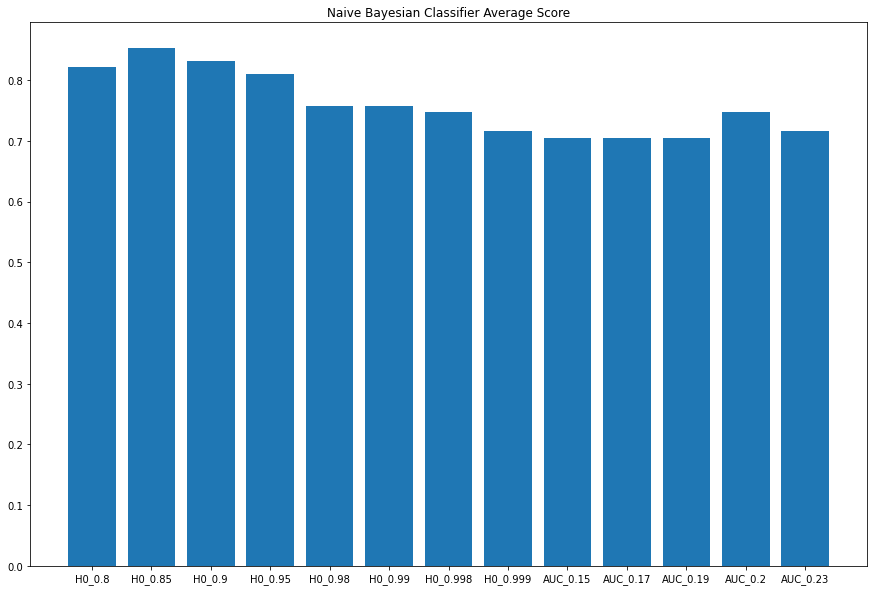

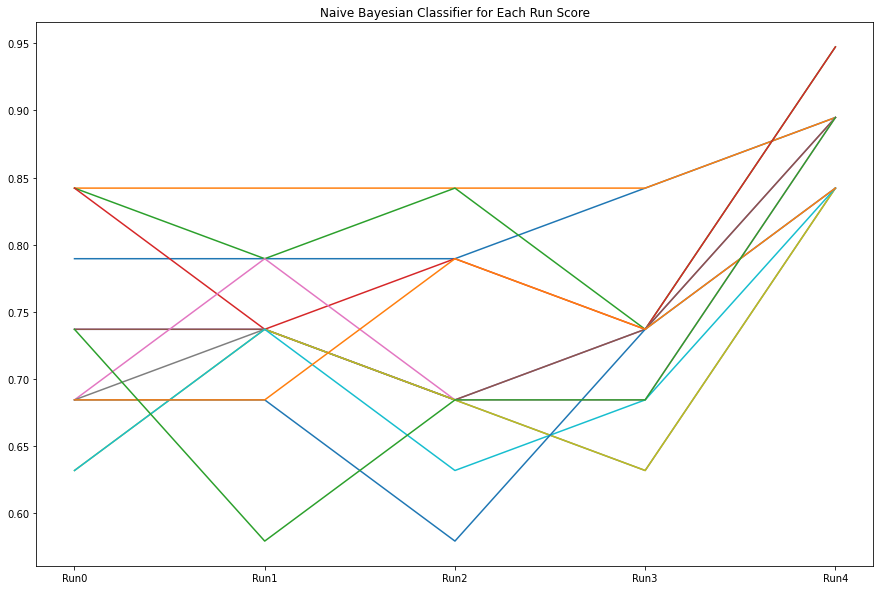

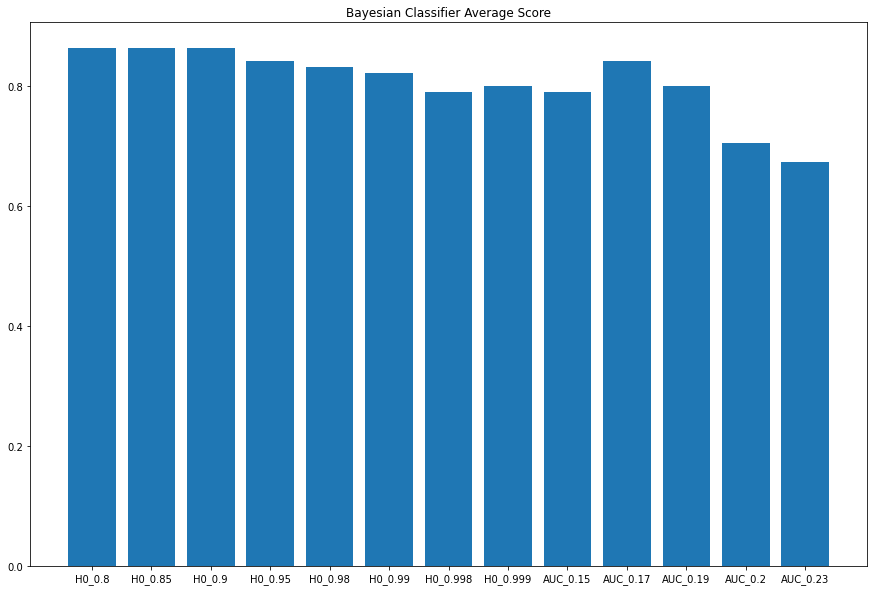

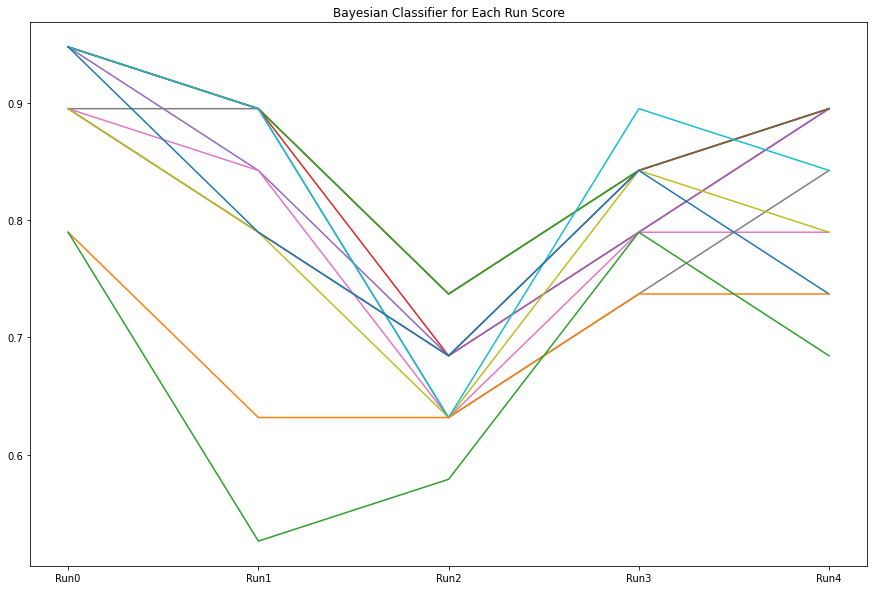

In [0]:
import matplotlib.pyplot as plt
def plot_cross_validation(ave_scores, all_scores, title):
  
  plt.figure(figsize=(15, 10))

  plot_x, plot_y = [], []
  for ave_idx in ave_scores:
    plot_x = plot_x + [ave_idx]
    plot_y = plot_y + [ave_scores[ave_idx]["score"]]
  plt.bar(plot_x, plot_y)
  plt.title(title + " " + "Average Score")
  plt.show() 

  plt.figure(figsize=(15, 10))
  line = []
  for x, all_idx in enumerate(all_scores):
    plot_x, plot_y = [], []
    for idx, run in enumerate(all_scores[all_idx]):
      plot_x = plot_x + [run]
      plot_y = plot_y + [all_scores[all_idx][run]]
    plt.plot(plot_x, plot_y)

  plt.title(title + " " + "for Each Run Score")
  plt.show()

plot_cross_validation(arcene_naive_ave_scores, arcene_naive_all_scores, "Naive Bayesian Classifier")
plot_cross_validation(arcene_bayesian_ave_scores, arcene_bayesian_all_scores, "Bayesian Classifier")

#Validate the Datasdet of Optical Recognition of Handwritten Digits

In [0]:
optical_pw = cal_pw(optical_train_label, optical_class)
logging.info(optical_pw)

[0.09835207951870259, 0.10175255035312582, 0.09939837823698666, 0.10175255035312582, 0.10122940099398378, 0.09835207951870259, 0.0986136541982736, 0.10122940099398378, 0.09939837823698666, 0.0999215275961287]


In [0]:
all_true = [True for i in range(len(optical_valid_dataset[0]))]
optical_all_feature_selected = {1: all_true}

In [0]:
#
# Valid the Data using Naive Bayesian Classifier
#

logging.info("===========================================================")
logging.info("Naive Bayesian Classifier")

all_true = [True for i in range(len(optical_train_dataset[0])) ]
all_feature_selected = {1: all_true}
logging.info("Valid the Data Based on all features")
acc, result_array = perform_validation_on_naive(optical_valid_dataset, optical_valid_label, optical_train_dataset, optical_train_label, optical_class,
                            optical_all_feature_selected[1])
confusion_matrix(result_array, optical_valid_label, optical_class)

Naive Bayesian Classifier
Valid the Data Based on all features


No. of selected feaature: 64
accuracy: 0.8881469115191987
          Prediction Result
Label    0    1    2    3    4    5    6    7    8    9
    0  168    0    0    0    9    1    0    0    0    0
    1    0  142   14    0    3    1    2    0    6   14
    2    0    6  156    0    2    0    0    0   11    2
    3    0    0    3  137    0    3    0    6   22   12
    4    0    1    0    0  175    0    0    1    3    1
    5    0    0    0    0    3  174    0    0    2    3
    6    0    3    0    0    6    0  172    0    0    0
    7    0    0    1    0   12    0    0  164    1    1
    8    0   20    0    0    3    0    0    0  140   11
    9    0    2    0    0    4    1    0    0    5  168


In [0]:
#
# Valid the Data using Naive Bayesian Classifier
#

logging.info("===========================================================")
logging.info("Naive Bayesian Classifier")

all_true = [True for i in range(len(optical_train_dataset[0])) ]
all_feature_selected = {1: all_true}
logging.info("Valid the Data Based on all features")
acc, result_array = perform_validation_on_naive(optical_valid_dataset, optical_valid_label, optical_train_dataset, optical_train_label, optical_class,
                            optical_all_feature_selected[1])
confusion_matrix(result_array, optical_valid_label, optical_class)

Naive Bayesian Classifier
Valid the Data Based on all features


No. of selected feaature: 64
accuracy: 0.8881469115191987
          Prediction Result
Label    0    1    2    3    4    5    6    7    8    9
    0  168    0    0    0    9    1    0    0    0    0
    1    0  142   14    0    3    1    2    0    6   14
    2    0    6  156    0    2    0    0    0   11    2
    3    0    0    3  137    0    3    0    6   22   12
    4    0    1    0    0  175    0    0    1    3    1
    5    0    0    0    0    3  174    0    0    2    3
    6    0    3    0    0    6    0  172    0    0    0
    7    0    0    1    0   12    0    0  164    1    1
    8    0   20    0    0    3    0    0    0  140   11
    9    0    2    0    0    4    1    0    0    5  168


In [0]:
#
# Valid the Data using Bayesian Classifier
#

logging.info("Valid the Data with All Features using Bayesian Classifier")
acc, result_array = perform_validation_on_bayesian(optical_valid_dataset, optical_valid_label, optical_train_dataset, optical_train_label, optical_class,
                                                   optical_all_feature_selected[1])
confusion_matrix(result_array, optical_valid_label, optical_class)

Valid the Data with All Features using Bayesian Classifier


No. of selected feaature: 64
accuracy: 0.9532554257095158
          Prediction Result
Label    0    1    2    3    4    5    6    7    8    9
    0  177    0    0    0    0    1    0    0    0    0
    1    0  166    2    0    1    0    2    0   11    0
    2    0    2  167    0    0    0    0    0    8    0
    3    0    0    1  158    0    1    0    0   21    2
    4    0    1    0    0  176    0    0    1    3    0
    5    0    0    0    0    1  177    0    0    1    3
    6    0    0    0    0    0    0  173    0    8    0
    7    0    0    0    0    0    0    0  176    2    1
    8    0    1    0    0    0    0    0    0  172    1
    9    0    0    0    1    2    1    0    0    5  171


#Validate the Datasdet of Glass

In [0]:
glass_pw = cal_pw(glass_train_label, glass_class)
glass_pw = [g if g != 0 else 0.0001 for g in glass_pw]
logging.info(glass_pw)

[0.32710280373831774, 0.35514018691588783, 0.0794392523364486, 0.0001, 0.06074766355140187, 0.04205607476635514, 0.13551401869158877]


In [0]:
all_true = [True for i in range(len(glass_train_dataset[0]))]
glass_all_feature_selected = {1: all_true}

In [0]:
#
# Valid the Data using Naive Bayesian Classifier
#

logging.info("===========================================================")
logging.info("Naive Bayesian Classifier")

acc, result_array = perform_validation_on_naive(glass_train_dataset, glass_train_label, glass_train_dataset, glass_train_label, glass_class, glass_all_feature_selected[1])
confusion_matrix(result_array, glass_train_label, glass_class)

Naive Bayesian Classifier


No. of selected feaature: 9
accuracy: 0.514018691588785
          Prediction Result
Label    1    2    3    4    5    6    7
    1    4   65    0    0    0    1    0
    2    2   65    0    0    7    2    0
    3    3   14    0    0    0    0    0
    4    0    0    0    0    0    0    0
    5    0    2    0    0   11    0    0
    6    0    3    0    0    1    5    0
    7    0    1    0    0    3    0   25


In [0]:
acc, result_array = perform_validation_on_naive(glass_train_dataset, glass_train_label_1, glass_train_dataset, glass_train_label_1, glass_class_1, glass_all_feature_selected[1])
confusion_matrix(result_array, glass_train_label_1, glass_class_1)

No. of selected feaature: 9
accuracy: 0.9252336448598131
          Prediction Result
Label    1    2
    1  151   12
    2    4   47


In [0]:
acc, result_array = perform_validation_on_naive(glass_train_dataset, glass_train_label_2, glass_train_dataset, glass_train_label_2, glass_class_2, glass_all_feature_selected[1])
confusion_matrix(result_array, glass_train_label_2, glass_class_2)

No. of selected feaature: 9
accuracy: 0.8411214953271028
          Prediction Result
Label    1    2    3
    1  134    0   12
    2   17    0    0
    3    5    0   46


In [0]:
#
# Valid the Data using Bayesian Classifier
#

logging.info("Valid the Data with All Features using Bayesian Classifier")
acc, result_array = perform_validation_on_bayesian(glass_train_dataset, glass_train_label, glass_train_dataset, glass_train_label, glass_class,
                                                   glass_all_feature_selected[1])
confusion_matrix(result_array, glass_train_label, glass_class)

Valid the Data with All Features using Bayesian Classifier


No. of selected feaature: 9
accuracy: 0.6869158878504673
          Prediction Result
Label    1    2    3    4    5    6    7
    1   23   44    3    0    0    0    0
    2    1   71    0    0    0    3    1
    3    2   11    4    0    0    0    0
    4    0    0    0    0    0    0    0
    5    0    1    0    0   12    0    0
    6    0    0    0    0    0    9    0
    7    0    1    0    0    0    0   28


In [0]:
acc, result_array = perform_validation_on_bayesian(glass_train_dataset, glass_train_label_1, glass_train_dataset, glass_train_label_1, glass_class_1,
                                                   glass_all_feature_selected[1])
confusion_matrix(result_array, glass_train_label_1, glass_class_1)

No. of selected feaature: 9
accuracy: 0.9252336448598131
          Prediction Result
Label    1    2
    1  148   15
    2    1   50


In [0]:
acc, result_array = perform_validation_on_bayesian(glass_train_dataset, glass_train_label_2, glass_train_dataset, glass_train_label_2, glass_class_2,
                                                   glass_all_feature_selected[1])
confusion_matrix(result_array, glass_train_label_2, glass_class_2)

No. of selected feaature: 9
accuracy: 0.8598130841121495
          Prediction Result
Label    1    2    3
    1  127    4   15
    2   10    7    0
    3    1    0   50
